# Цель работы
Получить практические навыки работы по решению задачи первичного анализа «сырых» данных, подготовки массива к обработке, выявления и описания зависимостей в исходных данных с использованием языка программирования.


# Ход работы
Ознакомиться с методическими материалами и примерами выполнения команд.
Последовательно выполнить следующие шаги применительно к выборке данных, согласно варианту задания:

1. Работа с данными

  1. Получить \*.csv-файл с исходными данными согласно варианту. С помощью текстового редактора определить наличие заголовка и знак-разделитель столбца

  2. С помощью библиотеки pandas создать таблицу (объект Dataframe) на основе \*.csv-файла с исходными данными

  3. Провести первичный анализ всех данных. Получить размер исходный таблицы

  4. Определить наличие пропусков и выбрать способ их обработки. Получить размер таблицы после обработки пропусков

  5. Определить наличие и привести нужные для работы признаки к числовому типу

  6. Сохранить в виде файла текущее состояние обработанной таблицы (Dataframe)


2. Выбор и обработка признаков

  1. Проверить взаимозависимость всех числовых признаков на основе матрицы корреляции

  2. Выбрать целевую переменную 'y' и независимые признаки 'x1, x2, x3, ...', оказывающие на нее влияние (целевая - 1 шт., признаки>=2 шт.)

  3. Исключить выбросы

  4. Сформировать обучающую и проверочную части выборки


10. Построить линейные регрессионные модели для каждого выбранной комбинации признаков :
  - m1: от единственного ЕДИНСТВЕННОЙ переменной (x1)
  - m2: от множества НАБОРА#1 переменных (пример: x1, x2, x3)
  - m3: от множества НАБОРА#2 переменных (пример: x5, x6, x7)

11. Выполнить анализ полученных моделей:

  1. Получить коэффициенты линейной регрессии y(x) = K*x + B

  2. Получить оценку точности R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение)

  3. Нанести график прямой y(x) = K*x + B поверх точечной диаграммы (выбранный признак, целевая переменная)
  
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  
  5. Построить гистограмму остатков (разностей между Y_pred и Y_test)
  
12. \* В качестве доп. задания предлагается расширить множество формируемых моделей.

# Содержание отчета

1. Результаты первичного анализа исходных данных
  1. Количество записей и признаков
  2. Смысловое описание признаков
  3. Типы данных столбцов и информация о пропусках
  4. Результат замены категориальных или ранговых данных на числовые
  5. Результат обработки пропущенных значений

2. Обоснование выбора целевой переменной и признаков для анализа
  1. Перечень вариантов целевых переменных, исходя из п. 1.2.
  2. Матрица коэффициентов корреляции
  3. Матрица смежности (графический вариант интерпретации взаимосвязей переменных)
  4. Информация о целевом значении и признаках на него влияющих
  5. Результат отчистки выбранных признаков исходного массива от выбросов

3. Результаты анализа полученных регрессионных линейных моделей (m11,m12,m21,m22)
  1. Уравнение линейной регрессии вида y(x_i, ...) =  K_i*x_i + ... + B
  2. Оценка точности R2 и RMSE
  3. График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: выбранный признак, x: целевая переменная)
  4. Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
  5. Гистограмму остатков (разностей между Y_pred и Y_test)
  

4. Выводы по результатам сравнительного анализа полученных регрессионных моделей

# Работа с данными

## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Загрузка входных данных

In [2]:
df = pd.read_csv('../datasets/abalone/abalone_nan.csv',  # путь к файлу, (используй автодотолнение)
                 sep=',',  # разделитель данных в файле

                 header=0,
                 )

df[:2]  # отобразить первые строки таблицы df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0


# Описание входных данных

Таблица abalone.csv содержит данные о молюсках, их возрасте (количестве колец на внутренней стенке панциря) и их физических параметрах

Параметры:

| Name		   | Data Type	      | Meas	   | Description             |
|----------|-----------------|---------|-------------------------|
| Sex		    | качественное		  | 	       | M, F, and I (infant)    |
| Length		 | количественное	 | mm	     | Измерение длинны        |
| Diameter	 | количественное	 | mm	     | диаметр панциря         |
| Height		 | количественное	 | mm      | высота с внутренностями |
| Whole weight	 | количественное	 | граммы	 | полный вес              |
| Shucked weight	 | количественное	 | граммы	 | вес внутренностей       |
| Viscera weight	 | количественное	 | граммы	 | вес кишечника           |
| Shell weight	 | количественное	 | граммы	 | вес панциря после сушки |
| Rings		  | integer         |         | +1.5 возраст молюска    |

Свойство __DataFrame.shape__ возвращает два значения соответствующей таблице - [кол-во строк, кол-во столбов]

In [3]:
print(df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(4177, 9)
Итого: 4177 записи, 9 столбец (признак).


In [4]:
df.describe()  # описание для числовых значений

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4165.000000,4166.000000,4164.000000,4168.000000,4164.000000,4168.000000,4167.000000,4171.000000
mean,0.523946,0.407796,0.139510,0.828910,0.359625,0.180610,0.238809,9.935507
std,0.120102,0.099253,0.041847,0.490509,0.222007,0.109638,0.139289,3.225782
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186500,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.233500,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.502250,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Построение графика отсутствующих значений

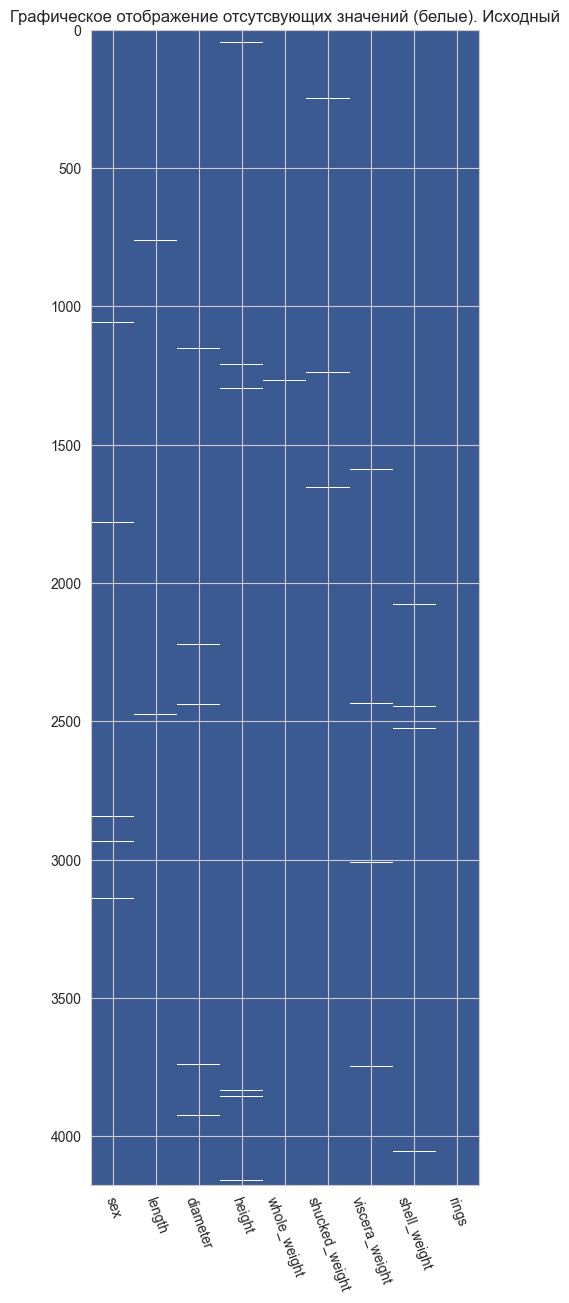

In [5]:
def plotTableNA(dataF, addToTilte=""):
    '''  Функция для построения графика отображение отсутсвующих значений'''
    if len(dataF.columns) > 20:
        K = 3
    elif len(dataF.columns) == 1:
        K = 1
    else:
        K = 1.7

    figSizeH = 15  # размер полотна, высота
    figSizeW = int(len(dataF.columns) / K)  # размер полотна, ширина
    fig, ax = plt.subplots(figsize=(figSizeW, figSizeH))

    # отрисовать матрицу значений функцией imshow. Применяется цветовая палитра
    plt.imshow(dataF.isna(),
               cmap=ListedColormap(['#3B5A92', 'white', ]),  #cm.get_cmap('jet'),
               aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
               interpolation='none', )
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70, )
    plt.title("Графическое отображение отсутсвующих значений (белые). " + addToTilte)


# Вызов функции с указанием параметров
plotTableNA(df, "Исходный")

In [6]:
print("Размер исходного DataFrame", df.shape)
print("Вар.3.1. Размер при исключении по строкам", df.dropna(axis='index', how='any').shape)
print("Вар.3.2. Размер при исключении по столбцам", df.dropna(axis='columns', how='any').shape)

Размер исходного DataFrame (4177, 9)
Вар.3.1. Размер при исключении по строкам (4077, 9)
Вар.3.2. Размер при исключении по столбцам (4177, 0)


### Результат обработки пропущенных значений

In [7]:
# axis='index' - удаление строк
# axis='columns' - удаление столбцов
df = df.dropna(axis='index', how='any')
print("Размер таблицы после исключения пропусков", df.shape)

Размер таблицы после исключения пропусков (4077, 9)


In [8]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

### Замена ранговых значений на числовые

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4077 non-null   object 
 1   length          4077 non-null   float64
 2   diameter        4077 non-null   float64
 3   height          4077 non-null   float64
 4   whole_weight    4077 non-null   float64
 5   shucked_weight  4077 non-null   float64
 6   viscera_weight  4077 non-null   float64
 7   shell_weight    4077 non-null   float64
 8   rings           4077 non-null   float64
dtypes: float64(8), object(1)
memory usage: 318.5+ KB


In [10]:
df.describe(include=['object'])

,sex
count,4077
unique,3
top,M
freq,1491


In [11]:
objColNames = ['sex']  # названия признаков в исходной таблицы
prefixColNames = ['sex_is']  # сокращенные названия признаков для новой таблицы

df_dummies = pd.get_dummies(
    df[objColNames],  # названия признаков в исходной
    prefix=prefixColNames,  # сокращенные названия в новой,
    dtype=int
)
df_dummies[:3]

,sex_is_F,sex_is_I,sex_is_M
0,0,0,1
1,0,0,1
2,1,0,0


In [12]:
# список названий числовых признаков исходной таблицы
digitColName = [
    'length',
    'diameter',
    'height',
    'whole_weight',
    'shucked_weight',
    'viscera_weight',
    'shell_weight',
    'rings']

# объединить выбранные столбцы из исходной таблицы df  с  столбцами созданной таблицы df_dummies
df_digPlus = pd.concat(
    [
        df[digitColName],
        df_dummies
    ],  # список объединяемых объектов

    axis='columns'  # способ объединения - по столбцам
)
df_digPlus[:3]

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_is_F,sex_is_I,sex_is_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0,1,0,0


In [13]:
corr_df = df_digPlus.corr(method='pearson')
corr_df["rings"]

length            0.559331
diameter          0.577274
height            0.558694
whole_weight      0.543156
shucked_weight    0.424810
viscera_weight    0.507189
shell_weight      0.628352
rings             1.000000
sex_is_F          0.251561
sex_is_I         -0.438589
sex_is_M          0.183873
Name: rings, dtype: float64

## Построение матрицы коэффициентов корреляции

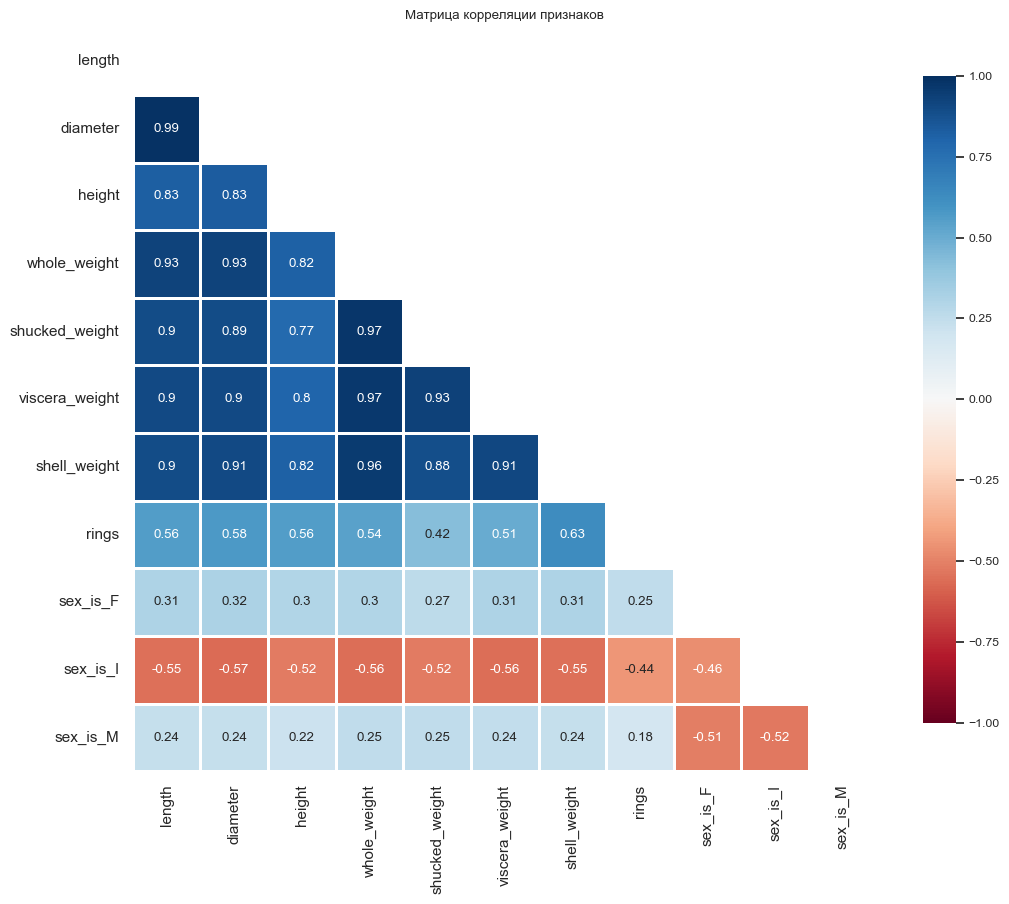

In [14]:
sns.set(style="white")  # цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=0.8)  # размер шрифта

# Построить тепловую карту
sns.heatmap(
    ##################
    data=corr_df,  ### <<<- объект-матрица корреляции
    ##################
    vmin=-1, vmax=1, center=0,
    annot=True,
    cmap='RdBu',
    mask=mask,  # применить маску
    square=True,  # форма ячейки - квадрат
    linewidths=1.0,  # зазор между ячейки
    cbar_kws={"shrink": .7}  # уменьшить размер легенды
)
plt.title(u'Матрица корреляции признаков');

### Влияние переменных на выбранный целевой параметр (rings, согласно варианту)

In [15]:
# Последовательное применение операции:
# - получить единственный столбец,
# - получить абсолютные значения,
# - отсортировать
corr_df[['rings']].abs().sort_values(by="rings")

,rings
sex_is_M,0.183873
sex_is_F,0.251561
shucked_weight,0.424810
sex_is_I,0.438589
viscera_weight,0.507189
whole_weight,0.543156
height,0.558694
length,0.559331
diameter,0.577274
shell_weight,0.628352


In [16]:
corr_df[['diameter']]

,diameter
length,0.986810
diameter,1.000000
height,0.832051
whole_weight,0.925179
shucked_weight,0.893356
viscera_weight,0.899213
shell_weight,0.905375
rings,0.577274
sex_is_F,0.319801
sex_is_I,-0.565333


In [17]:
corr_df[['whole_weight']]

,whole_weight
length,0.925102
diameter,0.925179
height,0.818027
whole_weight,1.000000
shucked_weight,0.969687
viscera_weight,0.966406
shell_weight,0.955775
rings,0.543156
sex_is_F,0.299950
sex_is_I,-0.559149


### Выбранные параметры:
- shell_weight (Вес панциря)
- diameter (Диаметр)
- sex_is_I (Пол)
- viscera_weight (Вес кишечника)

In [18]:
features = ['shell_weight', 'diameter', 'sex_is_I', 'viscera_weight']
target = ['rings']

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 700x700 with 0 Axes>

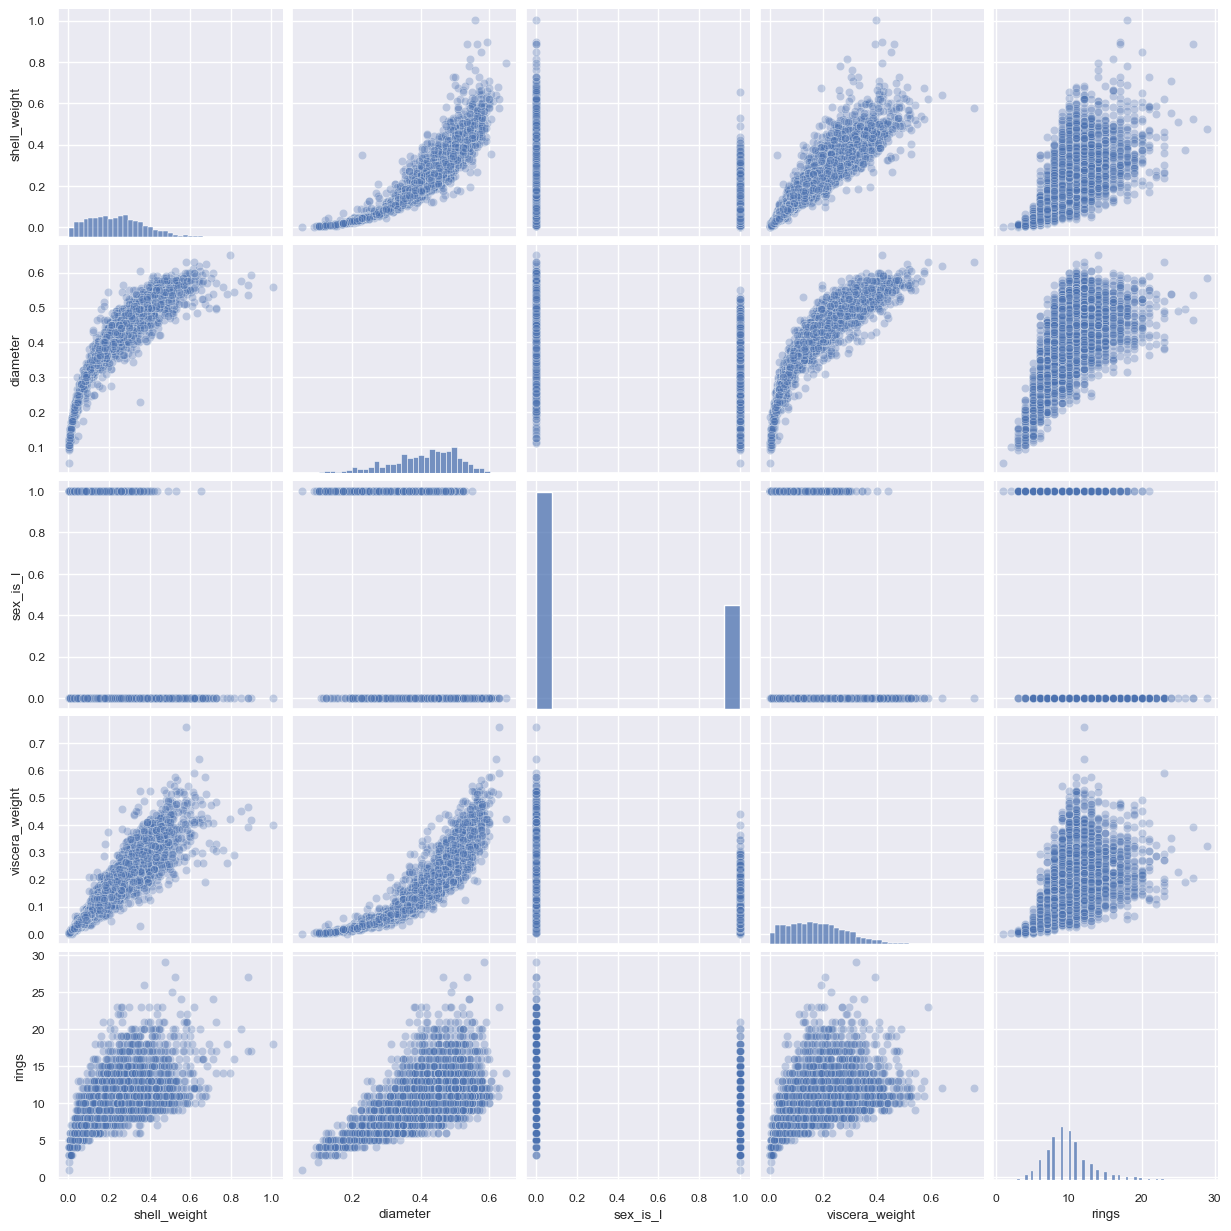

In [19]:
# График признаков попарно
plt.figure(figsize=(7, 7))
%config InlineBackend.figure_format = 'png'  # формат изображений PNG, для сокращения времени отрисовки графиков

sns.pairplot(
    df_digPlus[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",  # Тип даграмм: reg,scatter
    diag_kind='hist',  # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha': 0.3}  # прозрачность точек
)

# Очистка данных от выбросов

### Построение коробок с усами

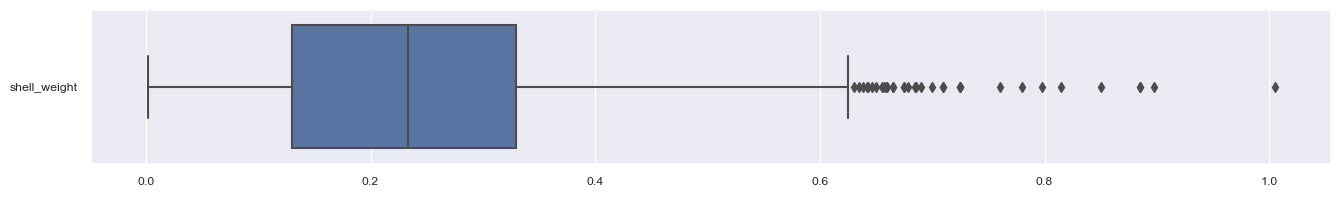

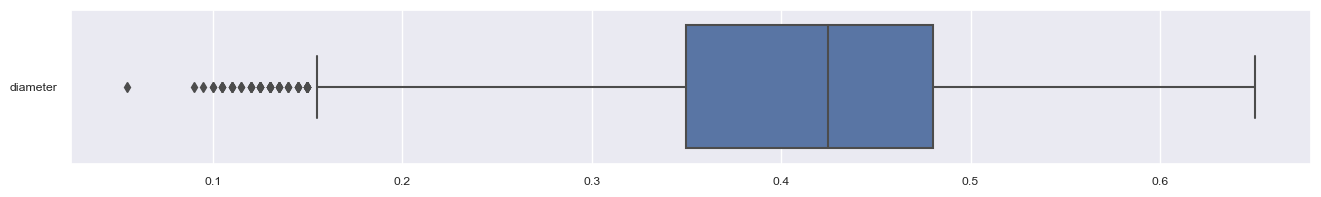

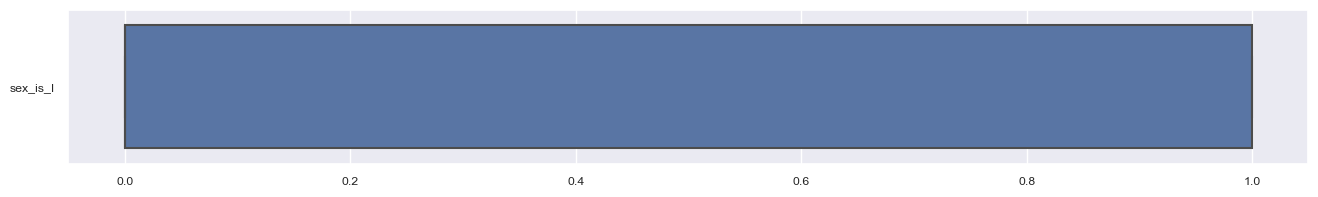

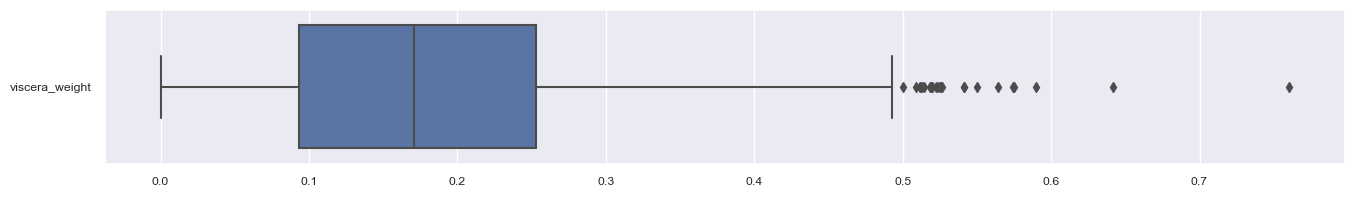

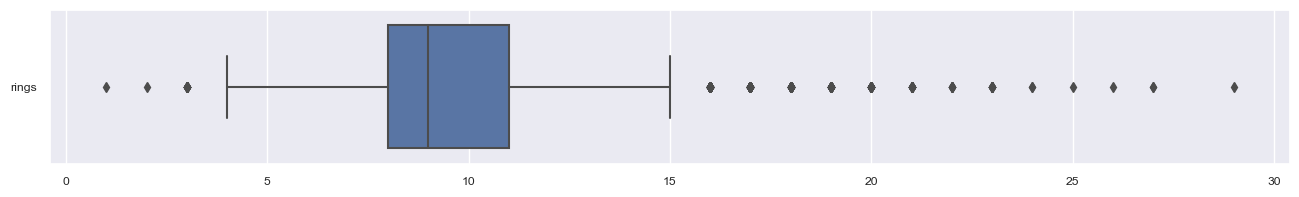

In [20]:
# Цикл: для каждого элемента в объединенном списке
for feature_name in (features + target):
    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16, 2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot(data=df_digPlus[[feature_name]],  # данные
                orient='h'  # ориентация графика
                )

In [21]:
# создадим "словарь"/"хэш-таблицу" для удобного обращения, где ключ - это название признака
thresholdDict = {
    'shell_weight': (df_digPlus.shell_weight.quantile(0.01), df_digPlus.shell_weight.quantile(0.99)),  # кол-во комнат
    'diameter': (df_digPlus.diameter.quantile(0.01), df_digPlus.diameter.quantile(1)),  # год постройки
    'viscera_weight': (df_digPlus.viscera_weight.quantile(0.01), df_digPlus.viscera_weight.quantile(0.99)),
    # год постройки
    'rings': (df_digPlus.rings.quantile(0.01), df_digPlus.rings.quantile(0.95)),  # год постройки
    'sex_is_I': (0, 1),
}

print(thresholdDict)

{'shell_weight': (0.01, 0.62), 'diameter': (0.14, 0.65), 'viscera_weight': (0.0075, 0.4760999999999994), 'rings': (4.0, 16.0), 'sex_is_I': (0, 1)}


In [22]:
for feature_name in thresholdDict:
    threshMin = thresholdDict[feature_name][0]  # извлечь нижнее пороговое
    threshMax = thresholdDict[feature_name][1]  # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(df_digPlus[
                         ~((df_digPlus[feature_name] >= threshMin) & (df_digPlus[feature_name] <= threshMax))
                         # фильтр по двум границам. ~ инверсия логических значений
                     ]
                     )

    dcount = df_digPlus[feature_name].count()  # кол-во эл. общее

    print('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        thresholdDict[feature_name],
        over_count,
        dcount,
        over_count / dcount,
    ))

shell_weight. Принимаем пороговые значение равными (0.01, 0.62).
  Кол-во эл. вне пороговых - 71 из 4077 значение(ий) (1.7%)

diameter. Принимаем пороговые значение равными (0.14, 0.65).
  Кол-во эл. вне пороговых - 40 из 4077 значение(ий) (1.0%)

viscera_weight. Принимаем пороговые значение равными (0.0075, 0.4760999999999994).
  Кол-во эл. вне пороговых - 80 из 4077 значение(ий) (2.0%)

rings. Принимаем пороговые значение равными (4.0, 16.0).
  Кол-во эл. вне пороговых - 209 из 4077 значение(ий) (5.1%)

sex_is_I. Принимаем пороговые значение равными (0, 1).
  Кол-во эл. вне пороговых - 0 из 4077 значение(ий) (0.0%)


In [23]:
# Во избежание путаницы создадим для полседующих операций копию исходного объетка
df_digPlusFiltered = df_digPlus.copy()

for feature_name in thresholdDict:
    threshMin = thresholdDict[feature_name][0]
    threshMax = thresholdDict[feature_name][1]

    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltered = df_digPlusFiltered[
        (df_digPlusFiltered[feature_name] >= threshMin) & (df_digPlusFiltered[feature_name] <= threshMax)
        ]
    print("Обработан ", feature_name)

print("Отброшено {} строк. Осталось {} строк.".format(
    len(df_digPlus) - len(df_digPlusFiltered),
    len(df_digPlusFiltered))
)

Обработан  shell_weight
Обработан  diameter
Обработан  viscera_weight
Обработан  rings
Обработан  sex_is_I
Отброшено 301 строк. Осталось 3776 строк.


shell_weight 0.01 0.62
diameter 0.14 0.6
sex_is_I 0 1
viscera_weight 0.0075 0.4725
rings 4.0 16.0


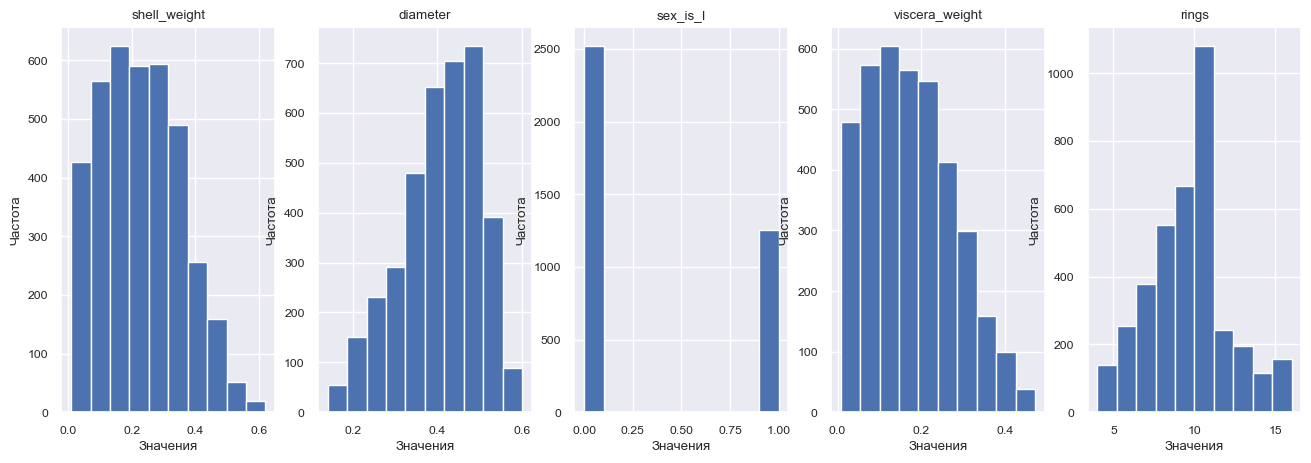

In [24]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features + target):
    plot_number += 1

    plt.subplot(1, len(features + target), plot_number)

    plt.hist(df_digPlusFiltered[feature_name])  # Построение гистограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print(feature_name,
          df_digPlusFiltered[feature_name].min(),
          df_digPlusFiltered[feature_name].max())

In [25]:
df_digPlusFiltered.to_csv('./datasets/abalone/abalone_PREPARED.csv', index=False)

# тренировка модели

In [26]:
valid_size = 0.3  # доля тестовой части в выборке
rand_seed = 8  # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test = train_test_split(
    df_digPlusFiltered[features],  # исходные данные X
    df_digPlusFiltered[target],  # исходные данные y

    test_size=valid_size,  # доля тестовой части в выборке
    random_state=rand_seed,  # начальное состояние генератора случ. чисел
    shuffle=True  # перемешивание
)

In [27]:
print("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format(
    len(x_train), len(y_train),
    len(x_test), len(x_test),
    len(x_train) + len(x_test), len(y_train) + len(x_test),
))

Кол-во элементов: 
  x_train: 2643, y_train 2643 
  x_test:  1133, y_test  1133 
  total x: 3776, total y 3776 


In [28]:
x_test[:3]
y_test[:3]

,rings
3096,9.0
1256,7.0
3833,11.0


In [29]:
def train_and_plot_model(name: str):
    lr = linear_model.LinearRegression()
    lin_model = lr.fit(
        x_train[[name]],
        y_train[['rings']]
    )
    # Получить вычисленные(predicted) зн. на проверочном наборе
    # y_pred = fittedModel.predict(x_test)
    y_predict = lin_model.predict(x_test[[name]])
    # Создать полотно для рисования с указаными размерами
    plt.figure(figsize=(15, 5))

    # Нанести график рассеяния - plt.scatter
    plt.scatter(x_train[[name]], y_train[['rings']], alpha=0.3, label='Тренировочный')  # тренировочный
    plt.scatter(x_test[[name]], y_test[['rings']], alpha=0.3, label='Проверочный')  # проверочный

    # Нанести график - линии через точки - plt.plot
    label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0],
                                                          lin_model.intercept_[0])

    plt.plot(x_test[[name]], y_predict,
             lw=2, color='red', label=label_str)

    plt.legend(loc="best")  # положение легенды
    plt.xlabel(name)  # подпись осей
    plt.ylabel(target[0])  # подпись осей
    plt.title(u'График разброса')  # Заголовок

    plt.figure(figsize=(6, 4))

    # Гистограмма и Плотность распределения - sns.distplot
    # data = y_true - y_pred
    #sns.distplot(y_test[['rings']]- y_pred_ringsYearBuilt)
    sns.histplot(y_test[['rings']] - y_predict,
                 color="red",
                 kde=True,  # оценка плотности в виде кривой
                 stat="density",  # density: общая площадь равна 1
                 )

    # Осевая линия
    plt.plot(
        [0, 0],
        [0, 10 * pow(10, -7)], '--', lw=2, c='r')

    plt.ylabel(u'Плотность')
    plt.xlabel(u'Значение ошибки')
    plt.title(u'Плотность распределения и гистограмма ошибок');
    plt.show()

    plt.figure(figsize=(12, 6))

    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
    plt.subplot(121)
    plt.scatter(y_test[['rings']], y_predict, alpha=0.1)
    plt.scatter(y_test[['rings']], y_test[['rings']], alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')

    # создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
    plt.subplot(122)
    plt.scatter(y_test[['rings']], (y_test[['rings']] - y_predict) ** 2, alpha=0.1)

    plt.title('Диаграмма рассеяния ошибок')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Абсолютная ошибка')

    print(f"Линейная одномерная регрессия. Признак '{name}'.", )
    print("y_predict_{} (x) = x * {} + {}\n".format(name, lin_model.coef_, lr.intercept_))

    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    '''
    mae = metrics.mean_absolute_error(y_test, y_predict)
    mse = metrics.mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_predict)

    print("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format(mae))
    print("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format(mse))
    print("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format(rmse))
    print("R2  : {:>9,.3f} (коэфф. детерминации)".format(r2))

    return lin_model


### Модель по весу панциря

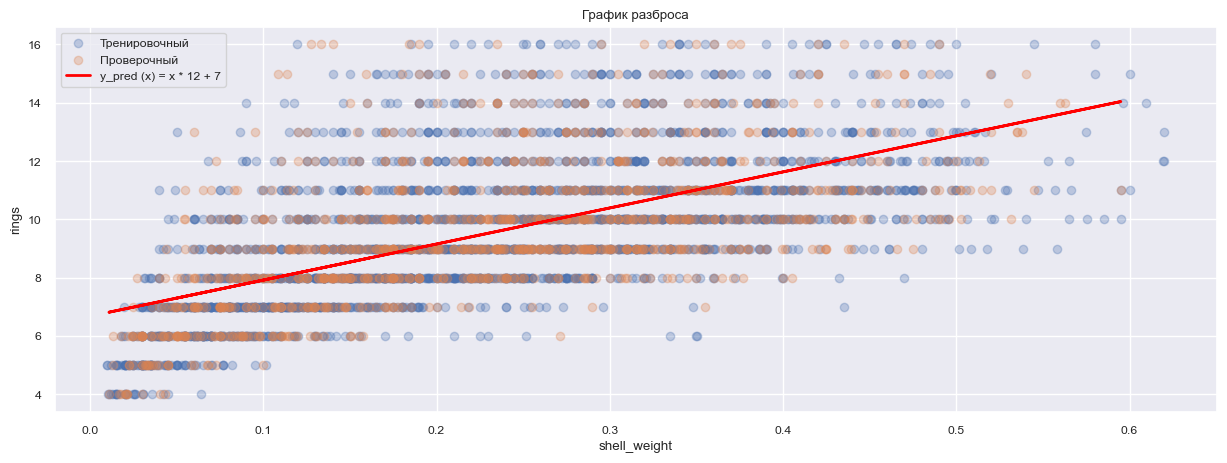

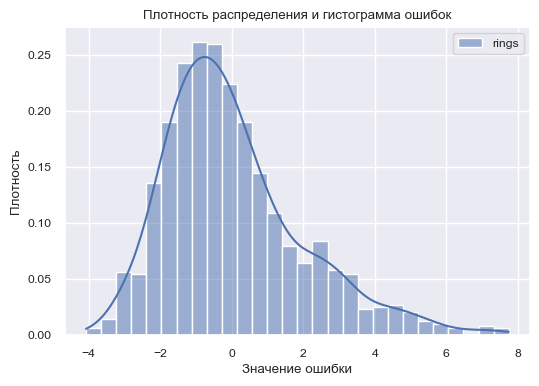

Линейная одномерная регрессия. Признак 'shell_weight'.
y_predict_shell_weight (x) = x * [[12.36558955]] + [6.68121414]

MAE :     1.490 (средняя абсолютная ошибка)
MSE :  3.789152 (среднеквадратичная ошибка)
RMSE:  1.946574 (кв. корень из среднеквадратичной ошибки)
R2  :     0.356 (коэфф. детерминации)


LinearRegression()

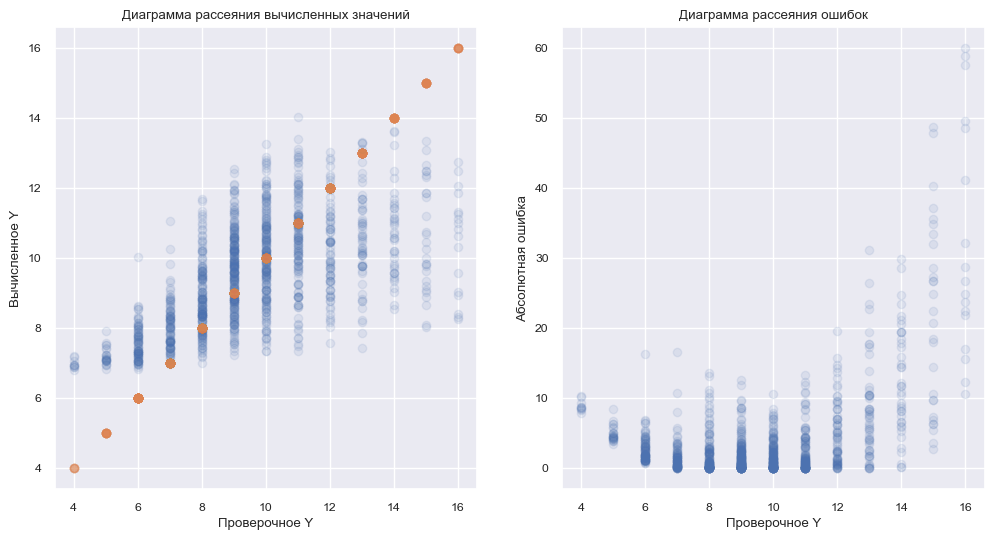

In [30]:
train_and_plot_model('shell_weight')

### Модель по полу

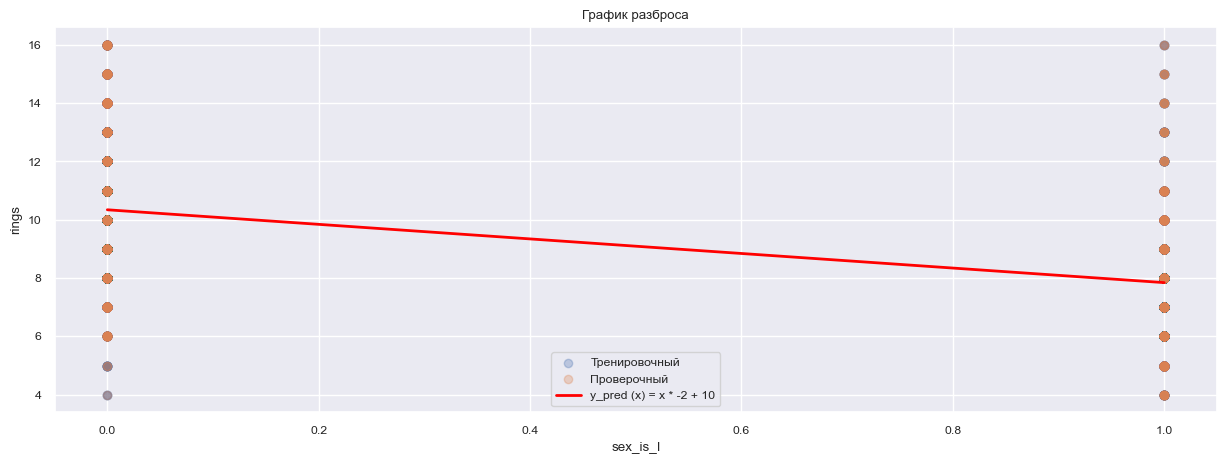

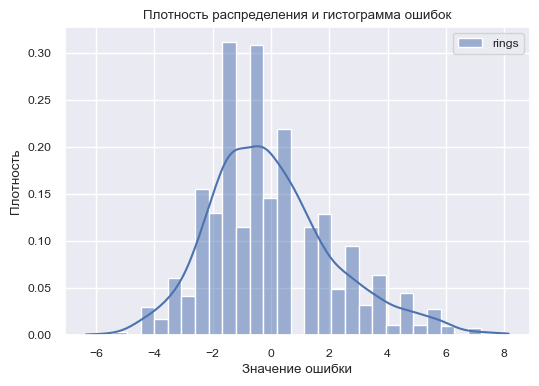

Линейная одномерная регрессия. Признак 'sex_is_I'.
y_predict_sex_is_I (x) = x * [[-2.49728575]] + [10.34188034]

MAE :     1.682 (средняя абсолютная ошибка)
MSE :  4.696937 (среднеквадратичная ошибка)
RMSE:  2.167242 (кв. корень из среднеквадратичной ошибки)
R2  :     0.202 (коэфф. детерминации)


LinearRegression()

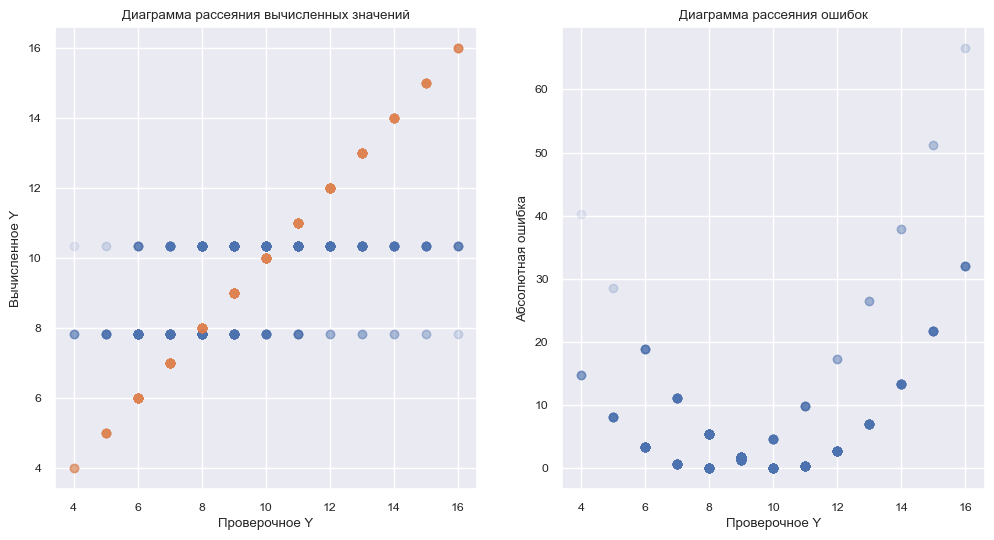

In [31]:
train_and_plot_model('sex_is_I')

### Модель по диаметру

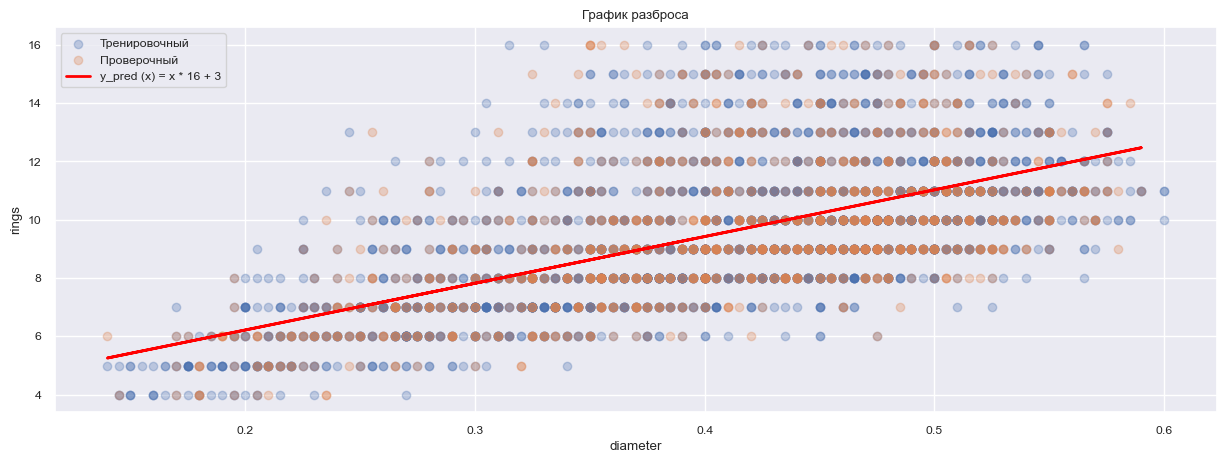

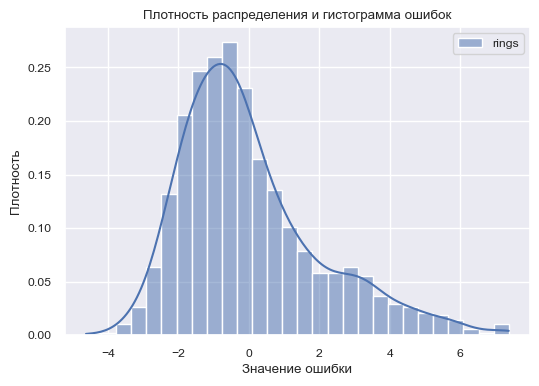

Линейная одномерная регрессия. Признак 'diameter'.
y_predict_diameter (x) = x * [[16.02251295]] + [3.0152355]

MAE :     1.530 (средняя абсолютная ошибка)
MSE :  3.969812 (среднеквадратичная ошибка)
RMSE:  1.992439 (кв. корень из среднеквадратичной ошибки)
R2  :     0.326 (коэфф. детерминации)


LinearRegression()

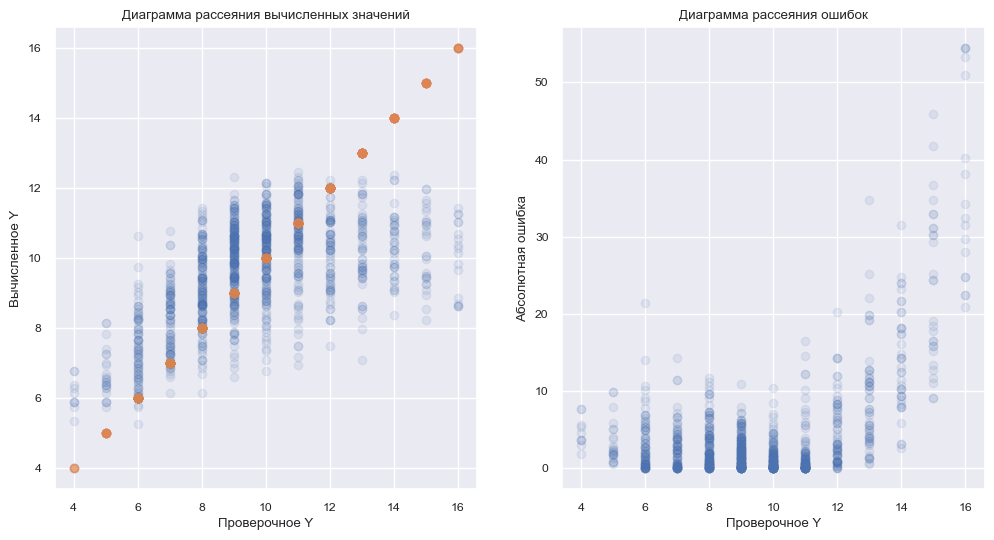

In [32]:
train_and_plot_model('diameter')

### Модель по весу кишечника

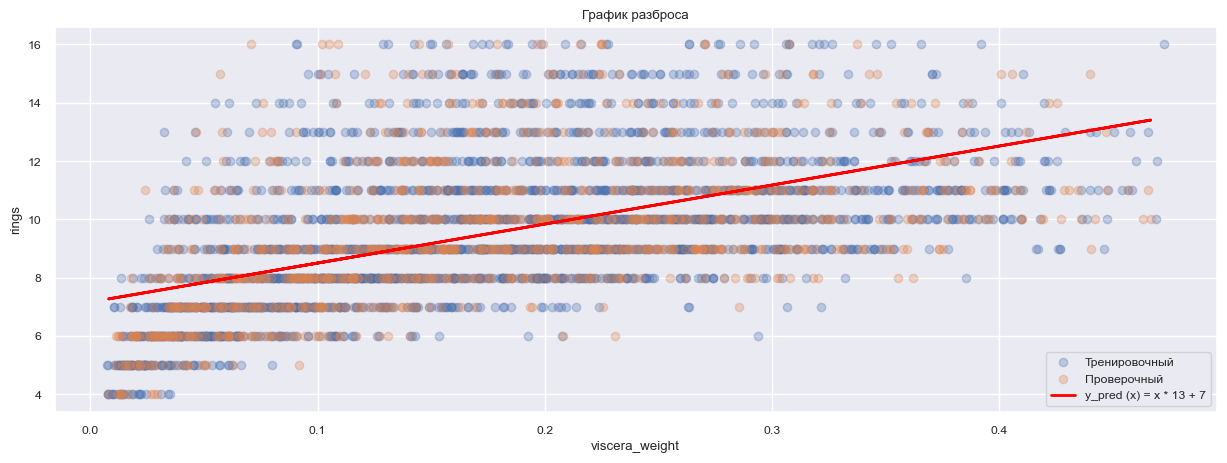

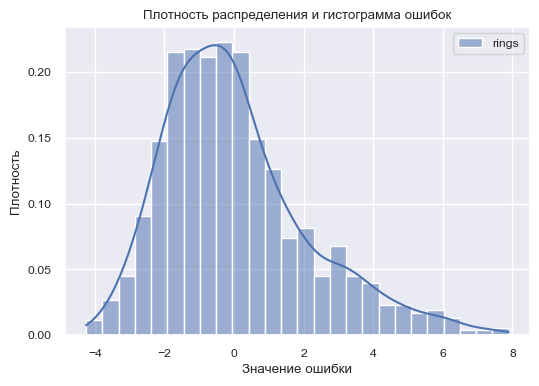

Линейная одномерная регрессия. Признак 'viscera_weight'.
y_predict_viscera_weight (x) = x * [[13.37441862]] + [7.16452831]

MAE :     1.603 (средняя абсолютная ошибка)
MSE :  4.371568 (среднеквадратичная ошибка)
RMSE:  2.090830 (кв. корень из среднеквадратичной ошибки)
R2  :     0.258 (коэфф. детерминации)


LinearRegression()

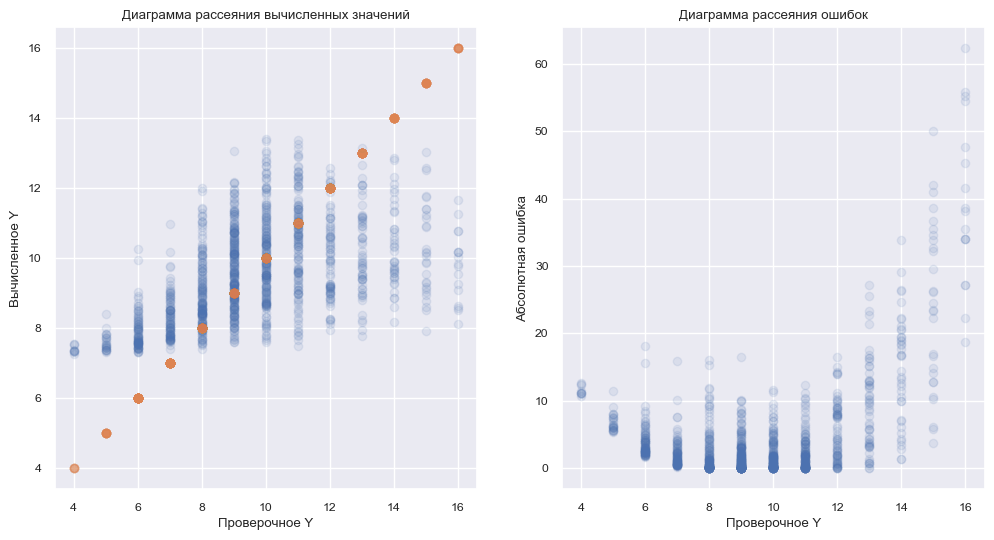

In [33]:
train_and_plot_model('viscera_weight')

# Многомерная модель по набору признаков (viscera_weight, shell_weight, diameter)

In [34]:
valid_size = 0.3
rand_seed = 8

x_train, x_test, y_train, y_test = train_test_split(
    df[['viscera_weight', 'shell_weight', 'diameter']],
    df[target],
    test_size=valid_size,
    random_state=rand_seed,
    shuffle=True
)

lr = linear_model.LinearRegression()
lin_model_all_vars = lr.fit(
    x_train[['viscera_weight', 'shell_weight', 'diameter']],
    y_train[target]
)
y_pred_all_vars = lin_model_all_vars.predict(x_test[['viscera_weight', 'shell_weight', 'diameter']])

df2 = pd.DataFrame(y_pred_all_vars.flatten())
df2.describe()

,0
count,1224.000000
mean,9.998564
std,2.201890
min,5.146102
25%,8.428907
50%,9.993762
75%,11.325362
max,23.422549


In [35]:
y_pred_all_vars

array([[ 6.53097505],
       [10.86964325],
       [ 7.94848338],
       ...,
       [ 7.48182622],
       [10.63070893],
       [10.1892755 ]])

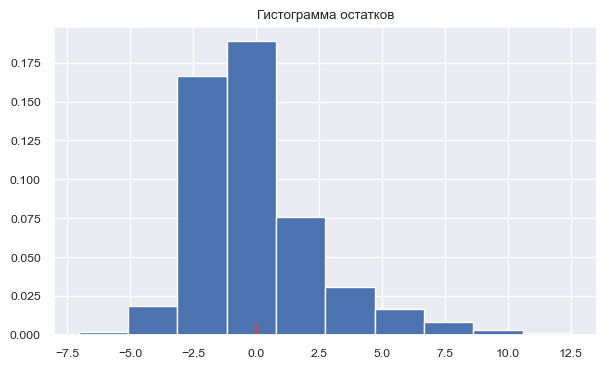

In [36]:
plt.figure(figsize=(7, 4))
plt.hist(np.array(y_test['rings']) - y_pred_all_vars.flatten(), density=True)
plt.title(u'Гистограмма остатков')
plt.plot(
    [0, 0],
    [0, 10 * pow(10, -3)], '--', lw=2, c='r')
plt.show()

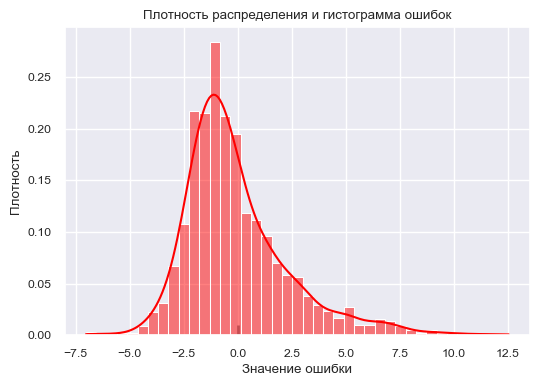

In [37]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test['rings'] - y_pred_all_vars.flatten(),
             color="red",
             kde=True,
             stat="density",
             )

plt.plot(
    [0, 0],
    [0, 10 * pow(10, -3)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Text(0, 0.5, 'Абсолютная ошибка')

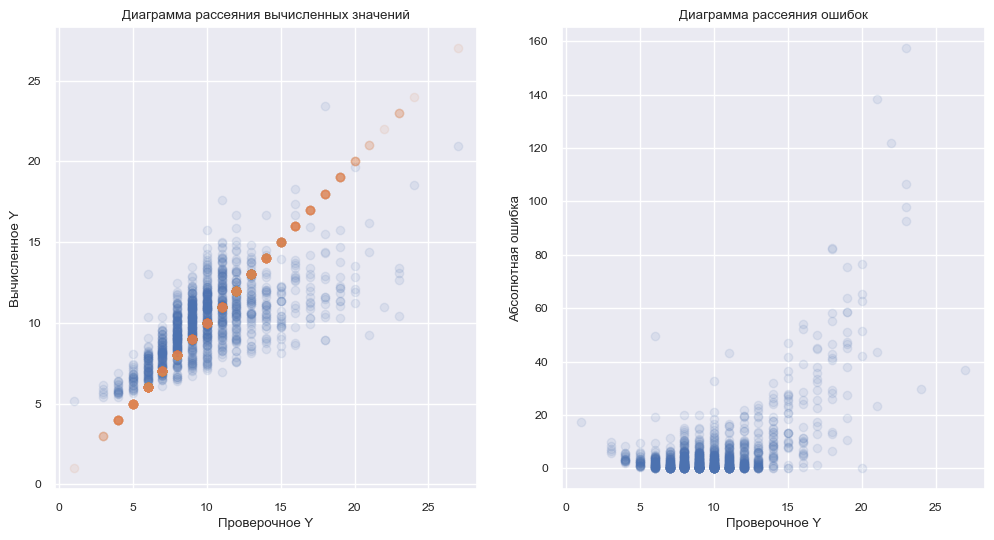

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(y_test[['rings']], y_pred_all_vars, alpha=0.1)
plt.scatter(y_test[['rings']], y_test[['rings']], alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

plt.subplot(122)
plt.scatter(y_test[['rings']], (y_test[['rings']] - y_pred_all_vars) ** 2, alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

In [39]:
print("Линейная одномерная регрессия. Признак 'rings'.")
print("y_pred_rings (x) = x * {} + {}\n".format(
    lin_model_all_vars.coef_, lin_model_all_vars.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae = metrics.mean_absolute_error(y_test, y_pred_all_vars)
mse = metrics.mean_squared_error(y_test, y_pred_all_vars)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_all_vars)

print("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format(mae))
print("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format(mse))
print("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format(rmse))
print("R2  : {:>9,.3f} (коэфф. детерминации)".format(r2))

Линейная одномерная регрессия. Признак 'rings'.
y_pred_rings (x) = x * [[-13.89679036  20.08920497   7.2097112 ]] + [4.726382]

MAE :     1.805 (средняя абсолютная ошибка)
MSE :  5.903310 (среднеквадратичная ошибка)
RMSE:  2.429673 (кв. корень из среднеквадратичной ошибки)
R2  :     0.428 (коэфф. детерминации)


# Модель по признакам Length, Whole Weight, Shucked Weight, Height

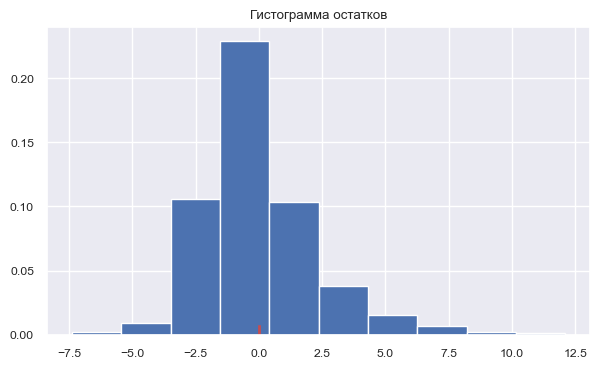

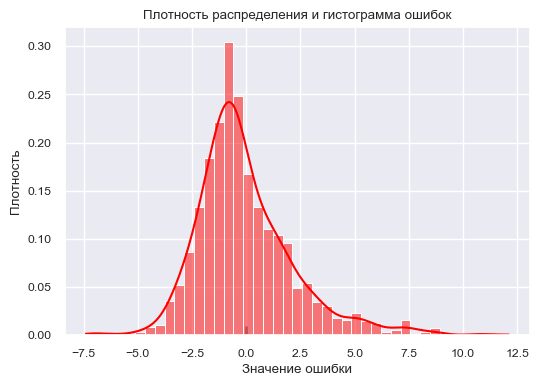

Линейная одномерная регрессия. Признак 'rings'.
y_pred_rings (x) = x * [[  8.37629791  11.63487934 -24.57324428  11.91359021]] + [3.08477502]

MAE :     1.674 (средняя абсолютная ошибка)
MSE :  5.145744 (среднеквадратичная ошибка)
RMSE:  2.268423 (кв. корень из среднеквадратичной ошибки)
R2  :     0.501 (коэфф. детерминации)


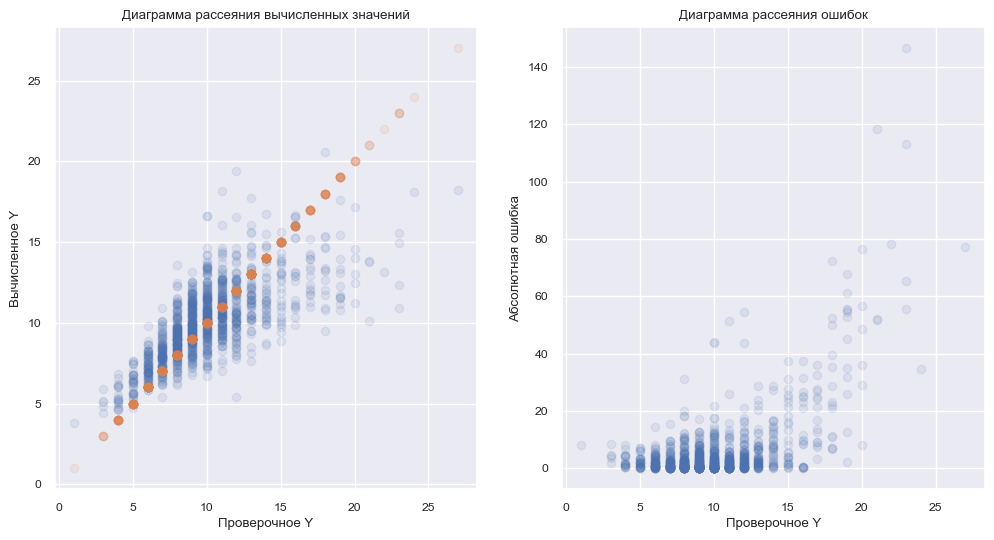

In [40]:
valid_size = 0.3
rand_seed = 8

x_train, x_test, y_train, y_test = train_test_split(
    df[['length', 'whole_weight', 'shucked_weight', 'height']],
    df[target],
    test_size=valid_size,
    random_state=rand_seed,
    shuffle=True
)

lr = linear_model.LinearRegression()
lin_model_all_vars = lr.fit(
    x_train[['length', 'whole_weight', 'shucked_weight', 'height']],
    y_train[target]
)
y_pred_all_vars = lin_model_all_vars.predict(x_test[['length', 'whole_weight', 'shucked_weight', 'height']])

df2 = pd.DataFrame(y_pred_all_vars.flatten())
df2.describe()

plt.figure(figsize=(7, 4))
plt.hist(np.array(y_test['rings']) - y_pred_all_vars.flatten(), density=True)
plt.title(u'Гистограмма остатков')
plt.plot(
    [0, 0],
    [0, 10 * pow(10, -3)], '--', lw=2, c='r')
plt.show()

plt.figure(figsize=(6, 4))

sns.histplot(y_test['rings'] - y_pred_all_vars.flatten(),
             color="red",
             kde=True,
             stat="density",
             )

plt.plot(
    [0, 0],
    [0, 10 * pow(10, -3)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(y_test[['rings']], y_pred_all_vars, alpha=0.1)
plt.scatter(y_test[['rings']], y_test[['rings']], alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

plt.subplot(122)
plt.scatter(y_test[['rings']], (y_test[['rings']] - y_pred_all_vars) ** 2, alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

print("Линейная одномерная регрессия. Признак 'rings'.")
print("y_pred_rings (x) = x * {} + {}\n".format(
    lin_model_all_vars.coef_, lin_model_all_vars.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae = metrics.mean_absolute_error(y_test, y_pred_all_vars)
mse = metrics.mean_squared_error(y_test, y_pred_all_vars)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_all_vars)

print("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format(mae))
print("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format(mse))
print("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format(rmse))
print("R2  : {:>9,.3f} (коэфф. детерминации)".format(r2))

# Сравнение итоговых моделей

In [1]:
import pandas as pd

ddf = pd.DataFrame(
    {
        "Признак": ["shell_weight", "'viscera_weight', 'shell_weight', 'diameter'", "'length', 'whole_weight', 'shucked_weight', 'height'"],
        "K": [12.36558955, "-", "-"],
        "B": [6.68121414, 4.726382, 3.08477502],
        "MAE": [1.682, 1.805, 1.674],
        "RMSE": [1.946574, 2.429673, 2.268423],
        "R2": [0.356, 0.428, 0.501],
    }
)
ddf

,Признак,K,B,MAE,RMSE,R2
0,shell_weight,12.36559,6.681214,1.682,1.946574,0.356
1,"'viscera_weight', 'shell_weight', 'diameter'",-,4.726382,1.805,2.429673,0.428
2,"'length', 'whole_weight', 'shucked_weight', 'h...",-,3.084775,1.674,2.268423,0.501


# Выводы

Был проанализирован датасет, содержащий данные о молюсках. Среди данных такие показатели, как - пол, размеры (диаметр, длина, высота), вес (общий, жировой, кишок). Была произведена модификация датасета:
- Строки с пропущенными значениями удалены
- Все данные приведены к числовому типу

Была произведена проверка взаимозвязи переменных посредством нахождения коэффициентов корреляции, и выбраны признаки для обучения модели.
- Все три показателя размера (диаметр, длина, высота) коррелируют друг с другом с коэффициентом >0.9, соответственно можно выбирать любой из них
- Все три показателя веса (общий, жировой, кишок) коррелируют друг с другом с коэффициентом >0.9, соответственно можно выбирать любой из них

Были исключены выбросы.

Были построенны регресионные модели зависимости количества колец:
- От отдельных признаков (диаметр, пол, жировой вес)
- Многомерная модель от нескольких признаков (диаметр, пол, вес панциря)
- Многомерная модель от нескольких признаков (высота, длина, общий вес, вес внутренностей)

Показатели RMSE двух многомерных моделей различаются несущественно, из чего можно сделать вывод о корелляции всех параметров веса и размера. Одномерная модель по параметру веса панциря имеет наименьший RMSE, что означает, что возраст наиболее явно кореллирует с весом панциря из всех предоставленных параметров, что в целом согласуется с предметной областью - так как возраст измеряется по количеству колец на стенке панциря моллюска, то чем больше вес моллюска - тем больше его панцирь, и тем больше колец на его стенке.
